# Decision Tree Examples

In [1]:
# loading libraries
from sklearn.datasets import load_iris, load_diabetes
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
iris = load_iris()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.3, random_state = 7)

In [ ]:
# Why scaling is not required for Decision Tree?


In [7]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [8]:
X_test.shape, y_test.shape

((45, 4), (45,))

In [8]:
model = DTC(criterion = 'entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
y_pred = model.predict(X_test)

In [12]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1])

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_test, y_pred)

0.8666666666666667

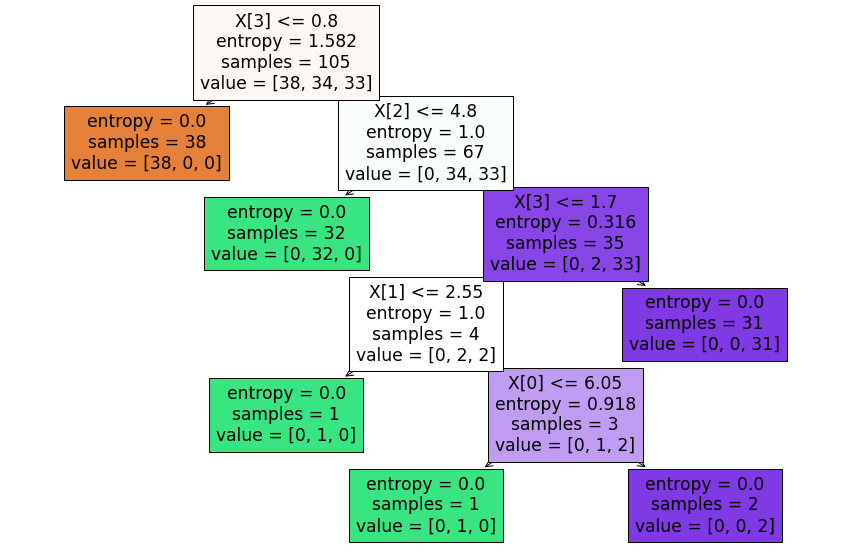

In [13]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled = True)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
model = DTC()

param_grid = dict(
    max_depth = [3, 4, 5, 6],
    min_samples_split = [2, 3, 4, 5],
    min_samples_leaf = [1, 2, 3]    
)

grid = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5
)

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [28]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [29]:
grid.best_score_

0.980952380952381

In [30]:
y_pred_g = grid.predict(X_test)

In [13]:
model2 = DTC(max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

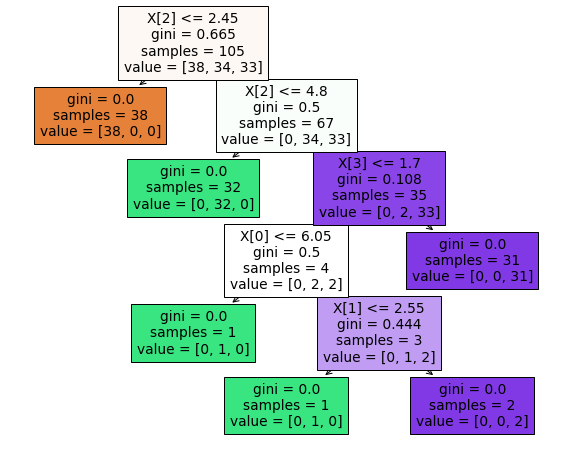

In [14]:
plt.figure(figsize=(10, 8))
tree.plot_tree(model2, filled = True)
plt.show()

In [32]:
y_pred = model2.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.8888888888888888

In [34]:
accuracy_score(y_test, y_pred_g)

0.9111111111111111

In [2]:
X, y = load_diabetes(return_X_y = True)

In [4]:
regressor = DTR(random_state=0)

score = cross_val_score(regressor, X, y, cv=10, scoring='r2')

In [ ]:
import numpy as np